#経済・ファイナンスデータの計量時系列分析　
#第1章　時系列分析の基礎概念

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

plt.style.use('ggplot')

###データ読み込み
データ入手元：http://www.geocities.jp/tatsuyoshi_okimoto/books/tsa.html

In [25]:
book ="./economicdata.xls"  
sheet="Sheet1"  
excel  = pd.ExcelFile(book)  
data = excel.parse(sheet,index_col="date")
#data = excel.parse(sheet)
data

,topix,exrate,indprod,cpi,saunemp,intrate
date,,,,,,
1975-01-01,276.09,29.13,47.33,52.625,1.7,12.67
1975-02-01,299.81,29.70,46.86,52.723,1.8,13.00
1975-03-01,313.50,29.98,46.24,53.114,1.8,12.92
1975-04-01,320.57,29.80,47.33,54.092,1.8,12.02
1975-05-01,329.65,29.79,47.33,54.385,1.8,11.06
1975-06-01,327.74,29.60,47.80,54.385,1.8,10.72
1975-07-01,323.47,29.94,48.27,54.483,1.8,11.00
1975-08-01,309.81,30.29,48.27,54.385,1.9,10.69
1975-09-01,299.07,30.34,48.67,55.559,2.0,9.67


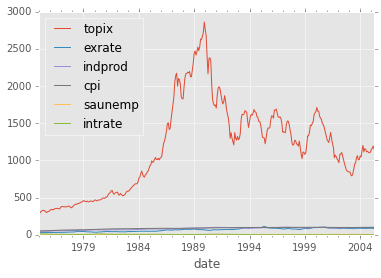

In [27]:
data.plot()

##時系列データの種類
###原系列  $y_t$
時系列データそのもの。時系列分析の目的は、ほとんどの場合原系列の性質を明らかにすること
###原系列に変換を施した系列
####対数系列 $\log y_t$
####差分（階差）系列 $\Delta y_t=y_t-y_{t-1}$
####対数差分系列 $\Delta \log y_t = \log y_t-\log y_{t-1} \\=\log (1+\cfrac {y_t-y_{t-1}}{y_{t-1}})\\\sim \cfrac {y_t-y_{t-1}}{y_{t-1}}（変化率）$

※本書では、季節調整は扱わない

###原系列 $y_t$と移動平均
※今回はTOPIXデータを利用します。


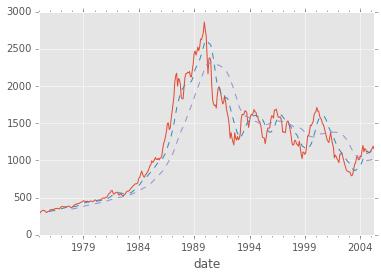

In [28]:
## データのプロット
data.topix.plot()  # TOPIX
pd.rolling_mean(data.topix,12).plot(style='--') # 12ヶ月の移動平均 
pd.rolling_mean(data.topix,36).plot(style='--') # 36ヶ月の移動平均

###対数系列 $\log y_t$

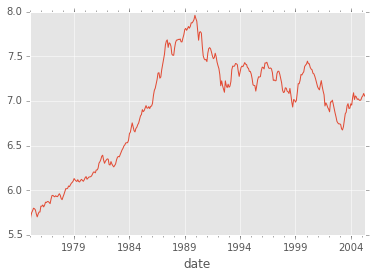

In [29]:
data['topix_log'] = np.log(data.topix) # DataFrameにフィールドを追加
data.topix_log.plot()

###差分（階差）系列 $\Delta y_t=y_t-y_{t-1}$

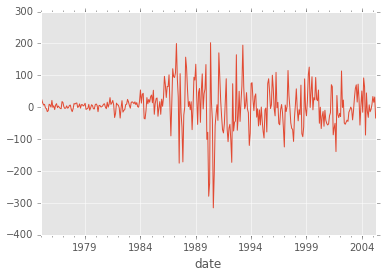

In [30]:
data['topix_diff'] = [data.topix[i] - data.topix[i-1] for i in range(len(data.topix)) ] # DataFrameにフィールドを追加
data['topix_diff'][0]=np.nan      # はじめの要素にはnullを代入
data.topix_diff.plot()

###対数差分系列 $\Delta \log y_t = \log y_t-\log y_{t-1}$

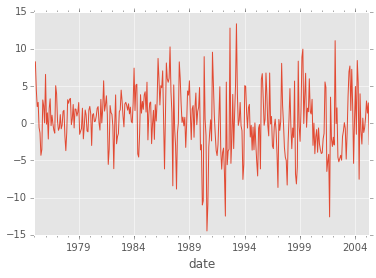

In [31]:
data['topix_diff_log'] = [data.topix_log[i] - data.topix_log[i-1] for i in range(len(data.topix_log)) ] 
data['topix_diff_log'][0]=np.nan      # はじめの要素にはnullを代入
(data.topix_diff_log*100).plot()      # 教科書の変化率グラフとおなじ

##基本統計量
基本統計量はtの関数として表される
###平均、期待値、一次モーメント  $\mu_t=E(y_t)$
###分散 $Var(y_t)=E(y_t-\mu_t)^2$
###標準偏差 $\sqrt{Var(y_t)}$

###自己共分散関数  $\gamma_{kt}=Cov(y_t,y_{t-k})=E[(y_t-\mu_t)(y_{t-k}-\mu_{t-k})]$
k=0の場合：分散
###自己相関関数  $\rho_{kt}=Corr(y_t,y_{t-k})=\cfrac{Cov(y_t,y_{t-k})}{\sqrt{Var(y_t)\cdot Var(y_{t-k})}}=\cfrac{\gamma_{kt}}{\sqrt{\gamma_{0t}\cdot \gamma_{0,t-k}}}$


###自己相関関数

<Container object of 31 artists>

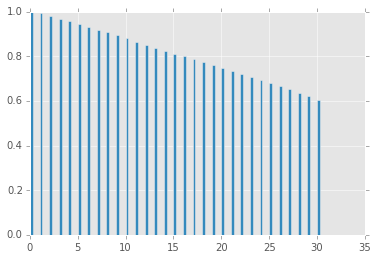

In [32]:
import statsmodels.tsa.stattools as stattools

topix_acf=stattools.acf(data.topix,nlags=30)
plt.bar(range(len(topix_acf)),topix_acf,width=0.3)  

###確率過程と時系列モデル
時系列データの各点は一度しか観測できないため、得られた時系列データから得られる情報は限られている

時系列分析では、時系列データ$\{y_t\}^T_{t=1}$を、ある確率変数列（母集団）$\{y_t\}^\infty_{-\infty}$からの1つの実現値（標本）とみなし、確率変数列（母集団）の生成過程に関して何らかの性質や構造を仮定する。

このような確率変数列を${\bf 確率過程}$または${\bf データ生成過程}$と呼び、その確率過程の構造を${\bf 時系列モデル}$と呼ぶ。

##定常性(stationarity)
####弱定常性（共分散定常性）
任意のtとkに対して、以下が成立する

$E(y_t)=\mu$

$Cov(y_t,y_{t-k})=E[(y_t-\mu)(y_{t-k}-\mu)]=\gamma_k$

平均がtに依存せず、さらに自己共分散および自己相関が時間差kのみに依存する

単に定常性というときは、一般的に弱定常性を指す

経済・ファイナンスデータでは、原系列が定常でなくとも、対数系列や差分系列が定常性を持つことが多い

####強定常性
任意のtとkに対して、$(y_t,y_{t+1},\cdots,y_{t+k})'$の同時分布が同一となる

####正規過程
任意のtとkに対して、$(y_t,y_{t+1},\cdots,y_{t+k})'$の同時分布が多変量正規分布となる

正規過程においては、弱定常性と強定常性は同値

###ホワイトノイズ
####iid(independently and identically distributed)過程（$\subset$ホワイトノイズ）
各時点のデータが互いに独立でかつ同一の分布に従う系列

期待値0のiid系列は、時系列モデルの錯乱項として用いられることがある

####ホワイトノイズ
すべての時点tにおいて、以下が成り立つ

$E(\varepsilon_t )=0$

$\gamma_k=E(\varepsilon_t\cdot \varepsilon_{t-k})=
  \begin{cases}
    \sigma^2, k=0 \\
    0, k\neq 0
  \end{cases}
$

多くのモデルの確率的変動はホワイトノイズで記述される

###iid過程（ホワイトノイズ）の例：正規ホワイトノイズ

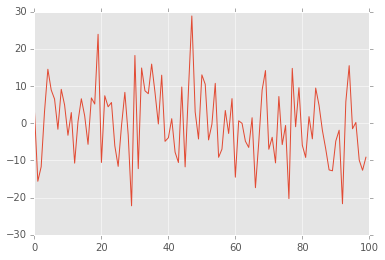

In [37]:
from random import normalvariate  #正規乱数
wnoise=[normalvariate(0, 10)  for i in range(100) ]
plt.plot(wnoise)

##自己相関の検定
時系列データが自己相関を持っているかどうかを検定する。自己相関を持っていれば、様々なモデルが適用できる（可能性がある）。

###1つの（それぞれのラグにおける）自己相関係数が0であるかどうかの検定 
$y_t$がiid系列に従うと仮定すると、標本自己相関係数$\hat{\rho_k}$は、平均0、分散1/T（T：標本サイズ）の正規分布に従う。この分布を前提にして検定を行う。

帰無仮説：$H_0:\rho_k=0$

対立仮説：$H_0:\rho_k\neq0$


###複数の自己相関係数がすべて0であるかどうかの検定（かばん検定、Ljung-Box検定）
一定の仮定のもとで、
$Q(m)=T(T+2)\sum^{m}_{k=1}\cfrac{\hat{\rho_k}}{T-k}\sim \chi^2(m)$
が成り立つ前提で検定を行う。

帰無仮説：$H_0:\rho_1=\rho_2=\cdots=\rho_m=0$

対立仮説：少なくとも1つの$k\in [1,m]$に対して、$\rho_k\neq0$

mが大きすぎると検出力が小さくなってしまい、小さすぎると、高次の自己相関を見逃してしまう

目安：$m\approx log(T)$


定常性を持つデータとして、TOPIXの差分系列の標本自己相関係数を求める

標本平均：2.43011019284


<Container object of 31 artists>

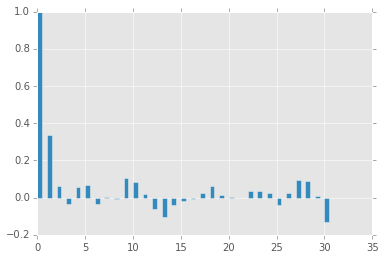

In [41]:
#data.topix_diff.plot()
print "標本平均："+ str( data.topix_diff.mean() )

topix_diff_acf=stattools.acf(data.topix_diff.dropna(),nlags=30)  # nanを0で置き換えて計算
plt.bar(range(len(topix_diff_acf)),topix_diff_acf,width=0.5)  

なんとなく周期性があるように見えるが、これが有意なものであるかどうか、検定によって確かめる

##検定を実施
###各ラグにおける自己相関係数が0であるかどうかの検定

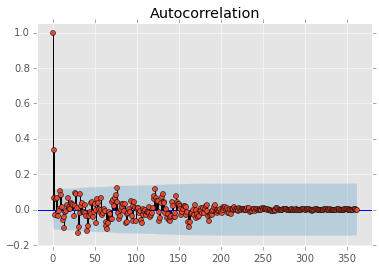

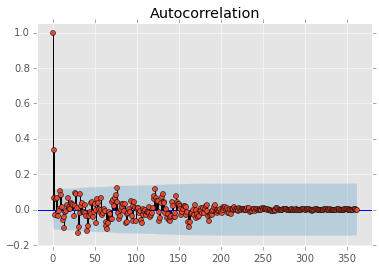

In [42]:
## 棄却域とともにプロット
import statsmodels.graphics.tsaplots as tsaplots
tsaplots.plot_acf(data.topix_diff.dropna())

###かばん検定（Ljung-Box検定 ）
T=350で logT=2.5だが、月次データなので12ポイントくらいは見たいところ

In [43]:
r,q,p = stattools.acf(data.topix_diff.dropna(), nlags=12, qstat=True) #qstat=true にすると、検定結果が得られる
lbt = np.c_[range(1,13), r[1:], q, p]
table = pd.DataFrame(lbt, columns=['lag', "AC", "Q", "P"])
table


,lag,AC,Q,P
0,1,0.335557,41.211902,1.365883e-10
1,2,0.064374,42.732838,5.256325e-10
2,3,-0.031728,43.103331,2.339766e-09
3,4,0.058691,44.374622,5.363197e-09
4,5,0.067108,46.041373,8.907654e-09
5,6,-0.036166,46.526808,2.325105e-08
6,7,0.004069,46.532968,6.883897e-08
7,8,-0.009209,46.564619,1.856114e-07
8,9,0.102837,50.522817,8.588775e-08
9,10,0.082530,53.079340,7.197563e-08
